## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  2 Hidden layers without Batch Normalization and DropOuts  </h2>

In [0]:
import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
#Neural network initilization
model = Sequential()

In [0]:
#defining layers with number of neurons in each layer , activation function and weight initilization method
model.add(Dense(600,input_shape = (784,),activation = "relu",kernel_initializer= keras.initializers.he_normal(seed=None)))
model.add(Dense(300,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model.add(Dense(10,activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_90 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_91 (Dense)             (None, 10)                3010      
Total params: 654,310
Trainable params: 654,310
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compling the model with type of optimization technique,loss and metrics
model.compile(optimizer = 'adam', loss=['categorical_crossentropy'], metrics=['accuracy'])

In [0]:
#fitting the train data ,so the data passes through each layer and compute loss and through back prop weights get updated after each batch.
history = model.fit(x=X_train, y=Y_train, batch_size=100, epochs=20, verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2033 - acc: 0.9393 - val_loss: 0.1244 - val_acc: 0.9605
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0746 - acc: 0.9768 - val_loss: 0.0778 - val_acc: 0.9753
Epoch 3/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0479 - acc: 0.9841 - val_loss: 0.0721 - val_acc: 0.9772
Epoch 4/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0322 - acc: 0.9896 - val_loss: 0.0759 - val_acc: 0.9773
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0281 - acc: 0.9904 - val_loss: 0.0931 - val_acc: 0.9751
Epoch 6/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0198 - acc: 0.9934 - val_loss: 0.0682 - val_acc: 0.9812
Epoch 7/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0191 - acc: 0.9936 - val_loss: 0.0835 - val_ac

Test score: 0.12619237270469932
Test accuracy: 0.9798


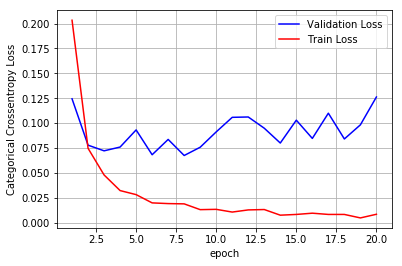

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

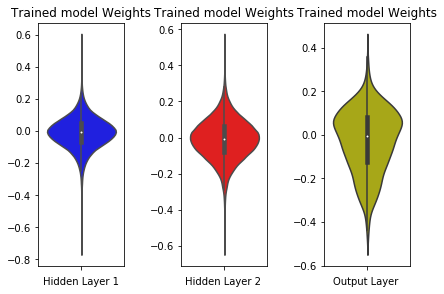

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

 <h3>  2LP + Relu activation + Adam Opti + 1BN layer</h3>

In [0]:
from keras.layers.normalization import BatchNormalization
model_BN = Sequential()

model_BN.add(Dense(600, activation='relu', input_shape=(784,),kernel_initializer= keras.initializers.he_normal(seed=None)))
model_BN.add(BatchNormalization())

model_BN.add(Dense(300, activation='relu',kernel_initializer= keras.initializers.he_normal(seed=None)))

model_BN.add(Dense(10, activation='softmax'))

model_BN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 600)               471000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 600)               2400      
_________________________________________________________________
dense_5 (Dense)              (None, 300)               180300    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3010      
Total params: 656,710
Trainable params: 655,510
Non-trainable params: 1,200
_________________________________________________________________


In [0]:
model_BN.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_BN.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.5906 - acc: 0.8239 - val_loss: 0.3031 - val_acc: 0.9090
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2740 - acc: 0.9211 - val_loss: 0.2308 - val_acc: 0.9295
Epoch 3/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.2158 - acc: 0.9370 - val_loss: 0.1963 - val_acc: 0.9405
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1830 - acc: 0.9474 - val_loss: 0.1745 - val_acc: 0.9474
Epoch 5/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1608 - acc: 0.9538 - val_loss: 0.1592 - val_acc: 0.9513
Epoch 6/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.1434 - acc: 0.9596 - val_loss: 0.1475 - val_acc: 0.9544
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1304 - acc: 0.9636 - val_loss: 0.1388 - val_acc

Test score: 0.09274776341468095
Test accuracy: 0.9708


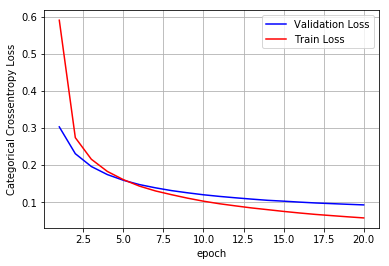

In [0]:
score = model_BN.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

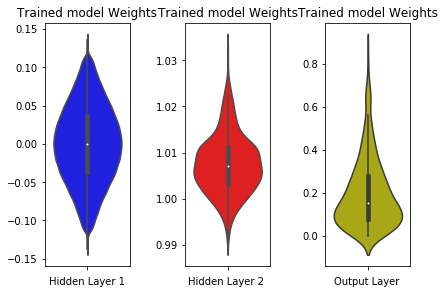

In [0]:
w_after = model_BN.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2>2LP + relu activation + ADAM optimizer +2BN </h2>

In [0]:
model_2BN = Sequential()
model_2BN.add(Dense(600, activation='relu', input_shape=(784,),kernel_initializer= keras.initializers.he_normal(seed=None)))
model_2BN.add(BatchNormalization())
model_2BN.add(Dense(300, activation='relu',kernel_initializer= keras.initializers.he_normal(seed=None)))
model_2BN.add(BatchNormalization())
model_2BN.add(Dense(10, activation='softmax'))

model_2BN.summary()

model_2BN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2BN.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 600)               471000    
_________________________________________________________________
batch_normalization_2 (Batch (None, 600)               2400      
_________________________________________________________________
dense_8 (Dense)              (None, 300)               180300    
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3010      
Total params: 657,910
Trainable params: 656,110
Non-trainable params: 1,800
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s

Test score: 0.08456707537262637
Test accuracy: 0.9799


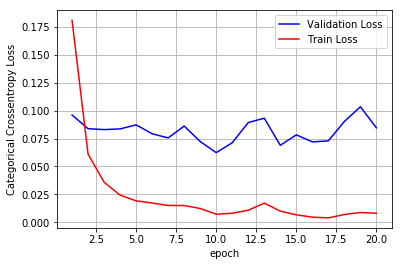

In [0]:
score = model_2BN.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

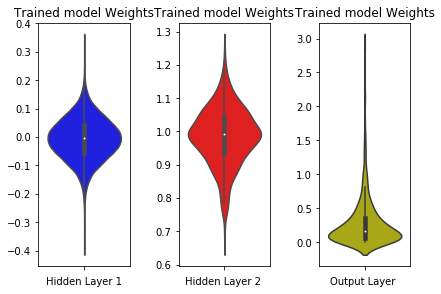

In [0]:
w_after = model_2BN.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2> 2LP + ReLU + Adam + 1 Droupout</h2>

In [0]:
# Multilayer perceptron
from keras.layers import Dropout


model_1DO = Sequential()
model_1DO.add(Dense(600, activation='relu', input_shape=(784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_1DO.add(Dropout(0.5))
model_1DO.add(Dense(200, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_1DO.add(Dense(10, activation='softmax'))

model_1DO.summary()

W0905 15:17:43.374562 140011877869440 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 200)               120200    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2010      
Total params: 593,210
Trainable params: 593,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1DO.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 315us/step - loss: 0.2657 - acc: 0.9183 - val_loss: 0.1411 - val_acc: 0.9564
Epoch 2/20
60000/60000 [==============================] - 18s 308us/step - loss: 0.1519 - acc: 0.9534 - val_loss: 0.0906 - val_acc: 0.9705
Epoch 3/20
60000/60000 [==============================] - 19s 310us/step - loss: 0.1239 - acc: 0.9622 - val_loss: 0.0753 - val_acc: 0.9750
Epoch 4/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.1059 - acc: 0.9670 - val_loss: 0.0728 - val_acc: 0.9779
Epoch 5/20
60000/60000 [==============================] - 18s 308us/step - loss: 0.0944 - acc: 0.9713 - val_loss: 0.0830 - val_acc: 0.9765
Epoch 6/20
60000/60000 [==============================] - 18s 308us/step - loss: 0.0904 - acc: 0.9730 - val_loss: 0.0723 - val_acc: 0.9792
Epoch 7/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.0819 - acc: 0.9745 - val_loss: 0.

Test score: 0.07668586428926828
Test accuracy: 0.9832


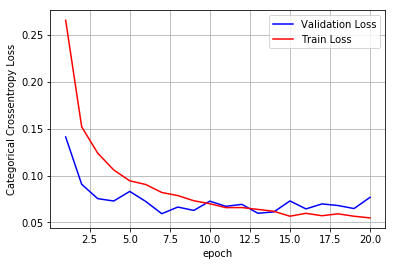

In [0]:
score = model_1DO.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

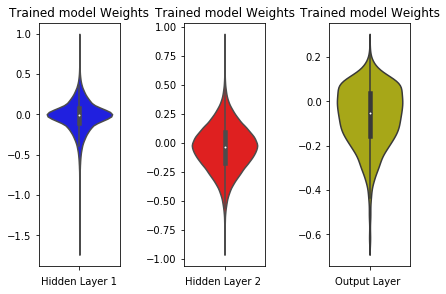

In [0]:
w_after = model_1DO.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2> 2LP + ReLU + ADAM + 2 Droupout </h2>

In [0]:
# Multilayer perceptron


model_2DO = Sequential()
model_2DO.add(Dense(600, activation='relu', input_shape=(784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2DO.add(Dropout(0.5))
model_2DO.add(Dense(200, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2DO.add(Dropout(0.5))
model_2DO.add(Dense(10, activation='softmax'))

model_2DO.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               120200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2010      
Total params: 593,210
Trainable params: 593,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_2DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2DO.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 334us/step - loss: 0.3418 - acc: 0.8963 - val_loss: 0.1290 - val_acc: 0.9642
Epoch 2/20
60000/60000 [==============================] - 19s 323us/step - loss: 0.1859 - acc: 0.9456 - val_loss: 0.0996 - val_acc: 0.9708
Epoch 3/20
60000/60000 [==============================] - 19s 323us/step - loss: 0.1601 - acc: 0.9535 - val_loss: 0.0886 - val_acc: 0.9743
Epoch 4/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.1411 - acc: 0.9594 - val_loss: 0.0833 - val_acc: 0.9747
Epoch 5/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.1309 - acc: 0.9620 - val_loss: 0.0760 - val_acc: 0.9784
Epoch 6/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.1197 - acc: 0.9655 - val_loss: 0.0804 - val_acc: 0.9765
Epoch 7/20
60000/60000 [==============================] - 20s 326us/step - loss: 0.1139 - acc: 0.9661 - val_loss: 0.

Test score: 0.08393812667645188
Test accuracy: 0.982


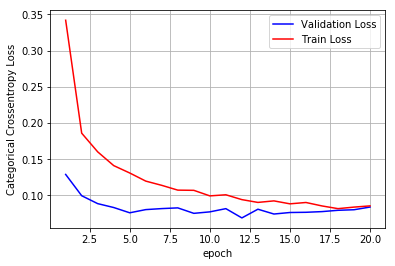

In [0]:
score = model_2DO.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

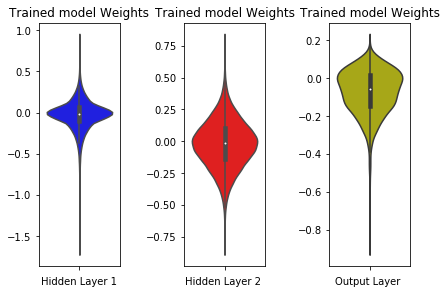

In [0]:
w_after = model_2DO.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2> 2LP + Batch-Norm + Droup Out + AdamOptimizer </2>

In [0]:
# Multilayer perceptron

model_BN_DO = Sequential()

model_BN_DO.add(Dense(600, activation='relu', input_shape=(784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_BN_DO.add(BatchNormalization())
model_BN_DO.add(Dropout(0.5))

model_BN_DO.add(Dense(300, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_BN_DO.add(BatchNormalization())
model_BN_DO.add(Dropout(0.5))

model_BN_DO.add(Dense(10, activation='softmax'))


model_BN_DO.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_4 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_4 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 300)               180300    
_________________________________________________________________
batch_normalization_5 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_5 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [0]:
model_BN_DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_BN_DO.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.4052 - acc: 0.8783 - val_loss: 0.1334 - val_acc: 0.9596
Epoch 2/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1846 - acc: 0.9443 - val_loss: 0.0998 - val_acc: 0.9676
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1440 - acc: 0.9560 - val_loss: 0.0883 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1194 - acc: 0.9632 - val_loss: 0.0786 - val_acc: 0.9745
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1043 - acc: 0.9661 - val_loss: 0.0694 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0937 - acc: 0.9703 - val_loss: 0.0673 - val_acc: 0.9791
Epoch 7/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0826 - acc: 0.9737 - val_loss: 0.0645 - val_acc

Test score: 0.05961396231273247
Test accuracy: 0.9825


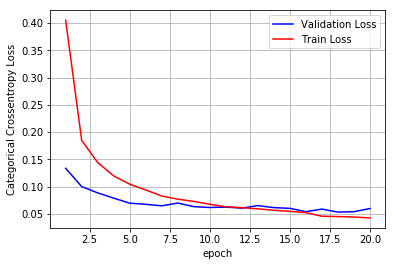

In [0]:
score = model_BN_DO.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

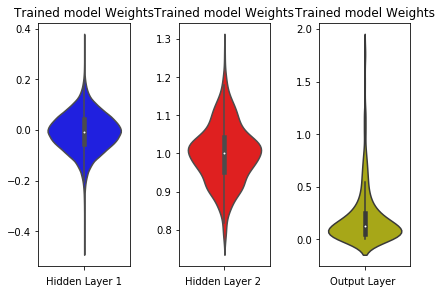

In [0]:
w_after = model_BN_DO.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2>  3 Hidden layers without Batch Normalization and DropOuts  </h2>

In [0]:
import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
#Neural network initilization
model = Sequential()

In [0]:
layer_1_neurons = 600
layer_2_neurons = 400
layer_3_neurons = 200
output = 10

In [0]:
#defining layers with number of neurons in each layer , activation function and weight initilization method
model.add(Dense(layer_1_neurons,input_shape = (784,),activation = "relu",kernel_initializer= keras.initializers.he_normal(seed=None)))

model.add(Dense(layer_2_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))

model.add(Dense(layer_3_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))

model.add(Dense(output,activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_20 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_21 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2010      
Total params: 793,610
Trainable params: 793,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compling the model with type of optimization technique,loss and metrics
model.compile(optimizer = 'adam', loss=['categorical_crossentropy'], metrics=['accuracy'])

In [0]:
#fitting the train data ,so the data passes through each layer and compute loss and through back prop weights get updated after each batch.
history = model.fit(x=X_train, y=Y_train, batch_size=200, epochs=20, verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2095 - acc: 0.9372 - val_loss: 0.1061 - val_acc: 0.9660
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0772 - acc: 0.9763 - val_loss: 0.1001 - val_acc: 0.9688
Epoch 3/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0516 - acc: 0.9831 - val_loss: 0.0859 - val_acc: 0.9738
Epoch 4/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0366 - acc: 0.9877 - val_loss: 0.0861 - val_acc: 0.9763
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0316 - acc: 0.9896 - val_loss: 0.0802 - val_acc: 0.9759
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0248 - acc: 0.9922 - val_loss: 0.0808 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0231 - acc: 0.9926 - val_loss: 0.0825 - val_acc

Test score: 0.09408597492728754
Test accuracy: 0.9815


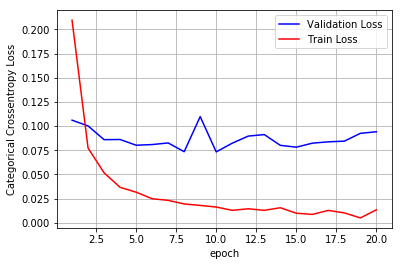

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

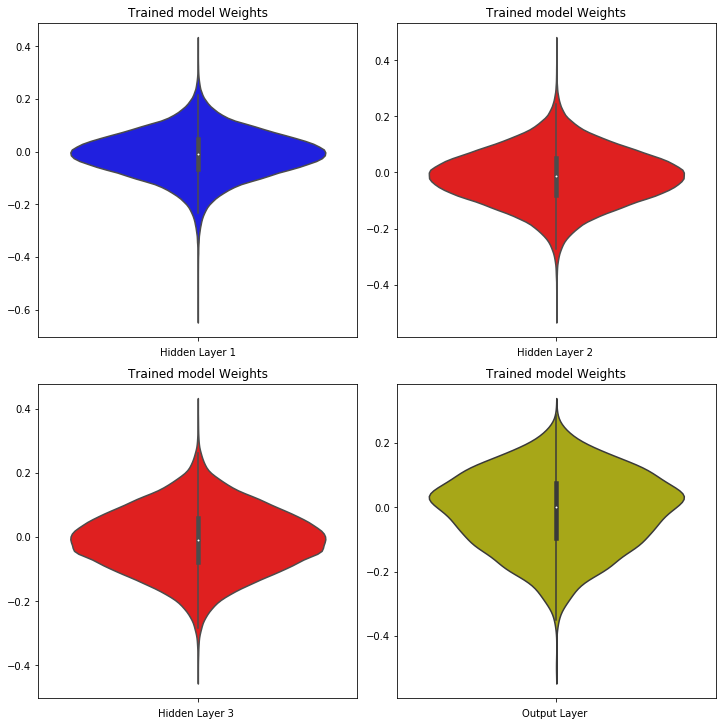

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

 <h3>  3LP + Relu activation + Adam Opti + 1BN layer</h3>

In [0]:
from keras.layers.normalization import BatchNormalization

model_BN = Sequential()

model_BN.add(Dense(layer_1_neurons,input_shape = (784,),activation = "relu",kernel_initializer= keras.initializers.he_normal(seed=None)))

model_BN.add(Dense(layer_2_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_BN.add(BatchNormalization())

model_BN.add(Dense(layer_3_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))

model_BN.add(Dense(output,activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))

model_BN.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_24 (Dense)             (None, 400)               240400    
_________________________________________________________________
batch_normalization_6 (Batch (None, 400)               1600      
_________________________________________________________________
dense_25 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                2010      
Total params: 795,210
Trainable params: 794,410
Non-trainable params: 800
_________________________________________________________________


In [0]:
model_BN.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_BN.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.5556 - acc: 0.8377 - val_loss: 0.2802 - val_acc: 0.9215
Epoch 2/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2495 - acc: 0.9285 - val_loss: 0.2121 - val_acc: 0.9372
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1927 - acc: 0.9459 - val_loss: 0.1793 - val_acc: 0.9468
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1613 - acc: 0.9548 - val_loss: 0.1608 - val_acc: 0.9521
Epoch 5/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.1401 - acc: 0.9608 - val_loss: 0.1467 - val_acc: 0.9558
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.1245 - acc: 0.9659 - val_loss: 0.1363 - val_acc: 0.9581
Epoch 7/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.1123 - acc: 0.9693 - val_loss: 0.1286 - val_acc

Test score: 0.09009407451748848
Test accuracy: 0.9712


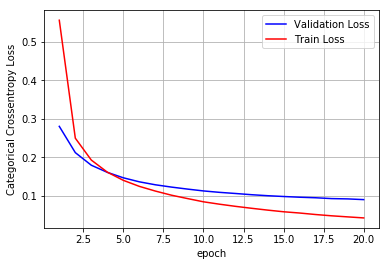

In [0]:
score = model_BN.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

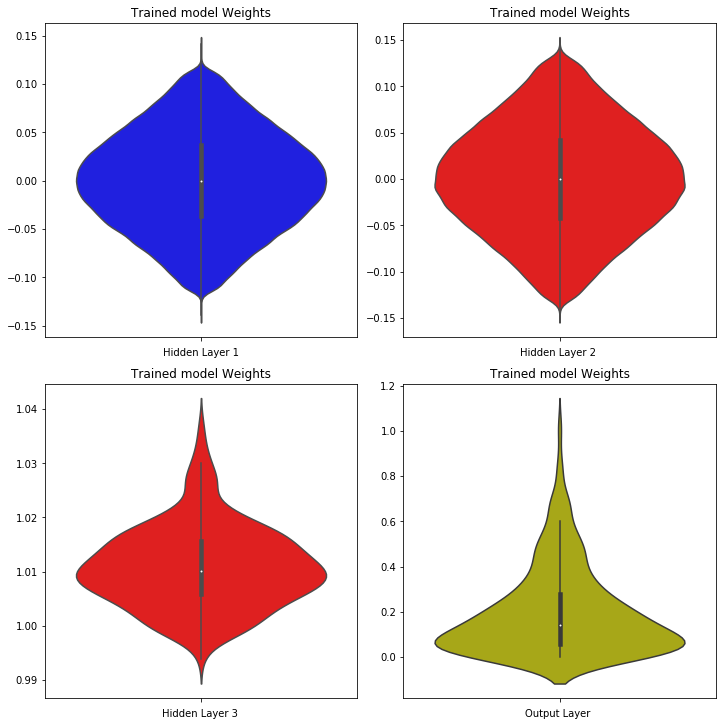

In [0]:
w_after = model_BN.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2>3LP + relu activation + ADAM optimizer +2BN </h2>

In [0]:
from keras.layers.normalization import BatchNormalization

model_2BN = Sequential()

model_2BN.add(Dense(layer_1_neurons,input_shape = (784,),activation = "relu",kernel_initializer= keras.initializers.he_normal(seed=None)))

model_2BN.add(Dense(layer_2_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2BN.add(BatchNormalization())

model_2BN.add(Dense(layer_3_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2BN.add(BatchNormalization())

model_2BN.add(Dense(output,activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2BN.summary()


model_2BN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model_2BN.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_28 (Dense)             (None, 400)               240400    
_________________________________________________________________
batch_normalization_7 (Batch (None, 400)               1600      
_________________________________________________________________
dense_29 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_8 (Batch (None, 200)               800       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2010      
Total params: 796,010
Trainable params: 794,810
Non-trainable params: 1,200
____________________________________________

Test score: 0.08589471304743639
Test accuracy: 0.9808


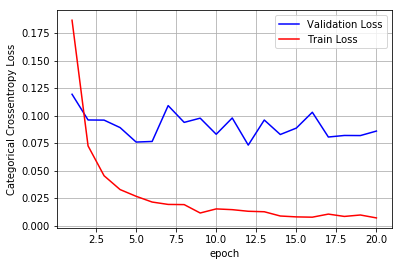

In [0]:
score = model_2BN.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

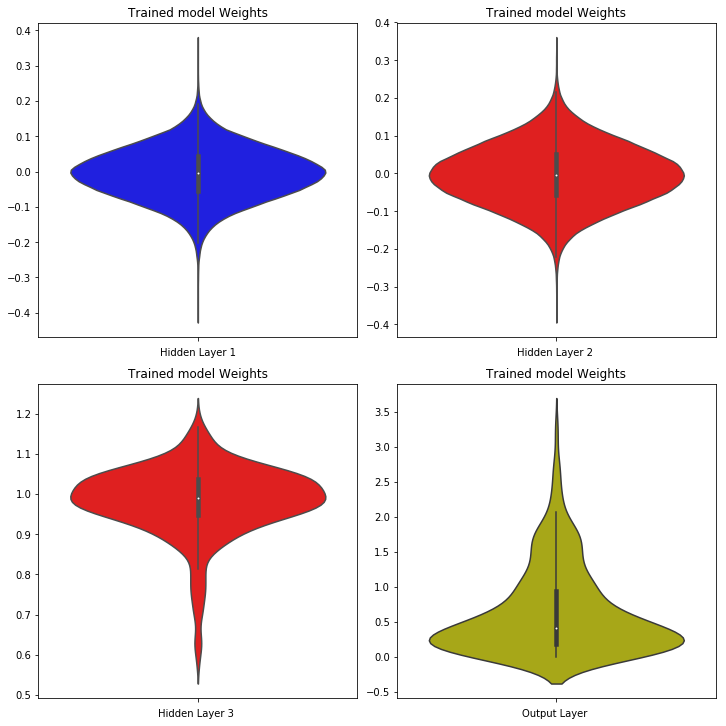

In [0]:
w_after = model_2BN.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2> 3LP + ReLU + Adam + 2 Droupout</h2>

In [0]:
# Multilayer perceptron
from keras.layers import Dropout


model_2DO = Sequential()

model_2DO.add(Dense(layer_1_neurons,input_shape = (784,),activation = "relu",kernel_initializer= keras.initializers.he_normal(seed=None)))

model_2DO.add(Dense(layer_2_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2DO.add(Dropout(0.5))
              
model_2DO.add(Dense(layer_3_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2DO.add(Dropout(0.5))
              
model_2DO.add(Dense(output,activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))

model_2DO.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_32 (Dense)             (None, 400)               240400    
_________________________________________________________________
dropout_6 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                2010      
Total params: 793,610
Trainable params: 793,610
Non-trainable params: 0
_______________________________________________

In [0]:
model_2DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2DO.fit(X_train, Y_train, batch_size=20, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 381us/step - loss: 0.2906 - acc: 0.9145 - val_loss: 0.1160 - val_acc: 0.9653
Epoch 2/20
60000/60000 [==============================] - 22s 372us/step - loss: 0.1362 - acc: 0.9617 - val_loss: 0.0946 - val_acc: 0.9730
Epoch 3/20
60000/60000 [==============================] - 22s 374us/step - loss: 0.1057 - acc: 0.9715 - val_loss: 0.0982 - val_acc: 0.9721
Epoch 4/20
60000/60000 [==============================] - 22s 367us/step - loss: 0.0917 - acc: 0.9759 - val_loss: 0.0960 - val_acc: 0.9737
Epoch 5/20
60000/60000 [==============================] - 22s 367us/step - loss: 0.0806 - acc: 0.9789 - val_loss: 0.0952 - val_acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 22s 369us/step - loss: 0.0716 - acc: 0.9820 - val_loss: 0.1001 - val_acc: 0.9756
Epoch 7/20
60000/60000 [==============================] - 22s 367us/step - loss: 0.0673 - acc: 0.9825 - val_loss: 0.

Test score: 0.12686301637388395
Test accuracy: 0.9821


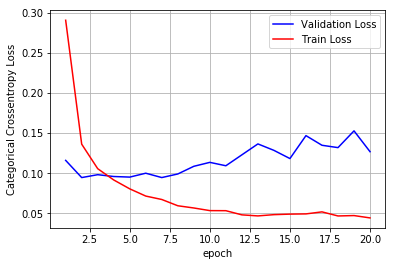

In [0]:
score = model_2DO.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

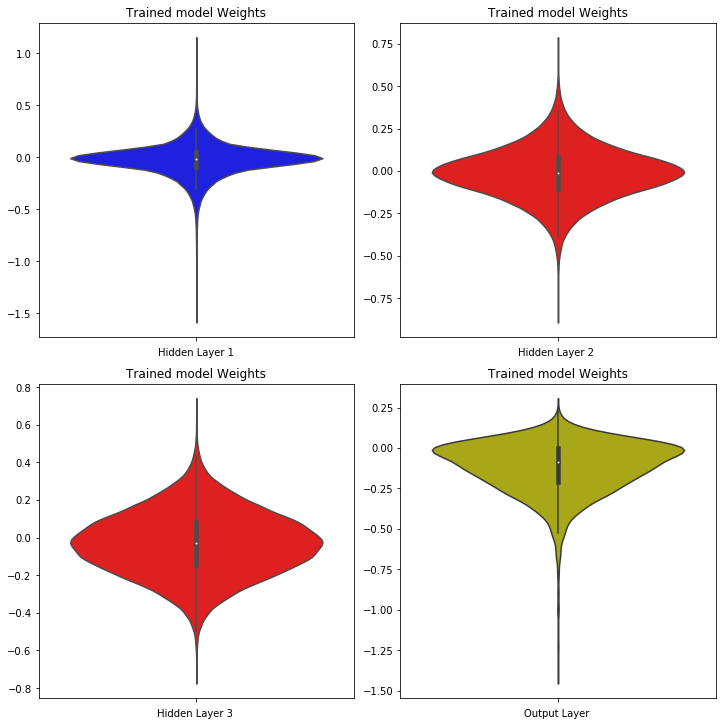

In [0]:
w_after = model_2DO.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2> 3LP + ReLU + ADAM + 3 Droupout </h2>

In [0]:
# Multilayer perceptron
from keras.layers import Dropout


model_3DO = Sequential()

model_3DO.add(Dense(layer_1_neurons,input_shape = (784,),activation = "relu",kernel_initializer= keras.initializers.he_normal(seed=None)))
model_3DO.add(Dropout(0.5))

model_3DO.add(Dense(layer_2_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3DO.add(Dropout(0.5))
              
model_3DO.add(Dense(layer_3_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3DO.add(Dropout(0.5))
              
model_3DO.add(Dense(output,activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))

model_3DO.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 400)               240400    
_________________________________________________________________
dropout_9 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)              

In [0]:
model_3DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3DO.fit(X_train, Y_train, batch_size=20, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 397us/step - loss: 0.4377 - acc: 0.8682 - val_loss: 0.1562 - val_acc: 0.9539
Epoch 2/20
60000/60000 [==============================] - 23s 376us/step - loss: 0.2408 - acc: 0.9334 - val_loss: 0.1195 - val_acc: 0.9656
Epoch 3/20
60000/60000 [==============================] - 23s 377us/step - loss: 0.2050 - acc: 0.9448 - val_loss: 0.1168 - val_acc: 0.9685
Epoch 4/20
60000/60000 [==============================] - 23s 381us/step - loss: 0.1829 - acc: 0.9502 - val_loss: 0.1011 - val_acc: 0.9714
Epoch 5/20
60000/60000 [==============================] - 22s 371us/step - loss: 0.1712 - acc: 0.9543 - val_loss: 0.1023 - val_acc: 0.9706
Epoch 6/20
60000/60000 [==============================] - 23s 377us/step - loss: 0.1618 - acc: 0.9565 - val_loss: 0.0965 - val_acc: 0.9727
Epoch 7/20
60000/60000 [==============================] - 23s 378us/step - loss: 0.1565 - acc: 0.9602 - val_loss: 0.

Test score: 0.10071252487748333
Test accuracy: 0.9784


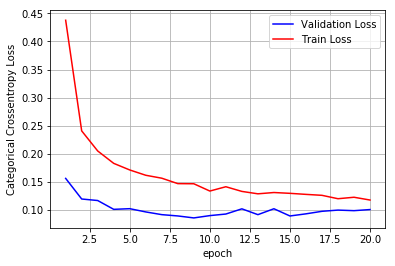

In [0]:
score = model_3DO.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

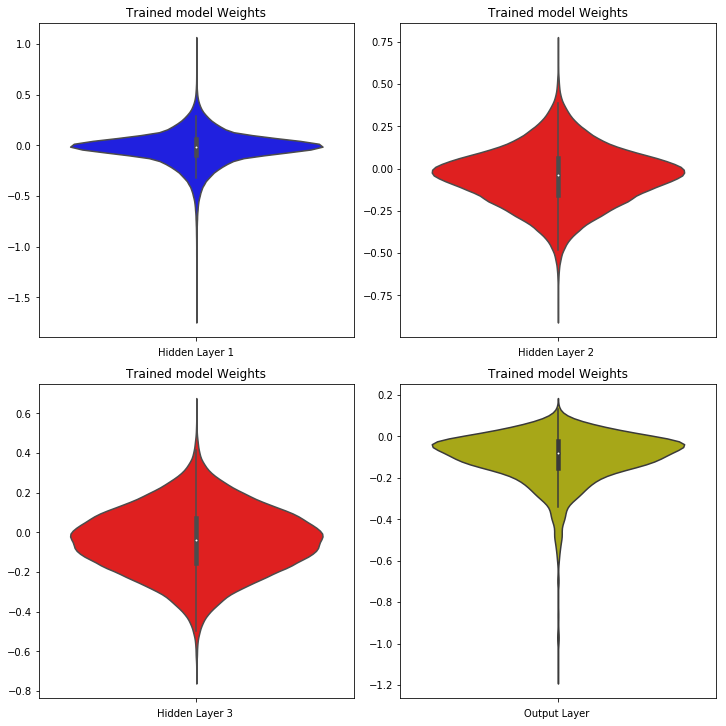

In [0]:
w_after = model_3DO.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2> 3LP + 2Batch-Norm + 2Droup Out + AdamOptimizer </2>

In [0]:
# Multilayer perceptron

model_BN_DO = Sequential()

model_BN_DO.add(Dense(layer_1_neurons, activation='relu', input_shape=(784,), kernel_initializer=keras.initializers.he_normal(seed=None)))

model_BN_DO.add(Dense(layer_2_neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_BN_DO.add(BatchNormalization())
model_BN_DO.add(Dropout(0.5))

model_BN_DO.add(Dense(layer_3_neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_BN_DO.add(BatchNormalization())
model_BN_DO.add(Dropout(0.5))

model_BN_DO.add(Dense(10, activation='softmax'))


model_BN_DO.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_40 (Dense)             (None, 400)               240400    
_________________________________________________________________
batch_normalization_9 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_11 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_10 (Batc (None, 200)               800       
_________________________________________________________________
dropout_12 (Dropout)         (None, 200)             

In [0]:
model_BN_DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_BN_DO.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.3963 - acc: 0.8792 - val_loss: 0.1350 - val_acc: 0.9565
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1631 - acc: 0.9508 - val_loss: 0.0997 - val_acc: 0.9698
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1130 - acc: 0.9662 - val_loss: 0.0960 - val_acc: 0.9706
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0862 - acc: 0.9735 - val_loss: 0.0771 - val_acc: 0.9778
Epoch 5/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0658 - acc: 0.9804 - val_loss: 0.0721 - val_acc: 0.9779
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0543 - acc: 0.9829 - val_loss: 0.0674 - val_acc: 0.9797
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0456 - acc: 0.9857 - val_loss: 0.0760 - val_acc

Test score: 0.07613349099411462
Test accuracy: 0.9837


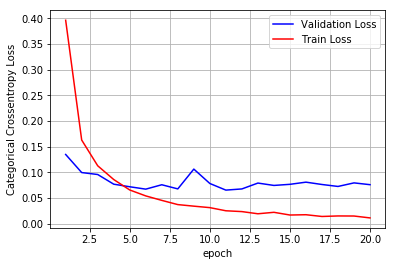

In [0]:
score = model_BN_DO.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

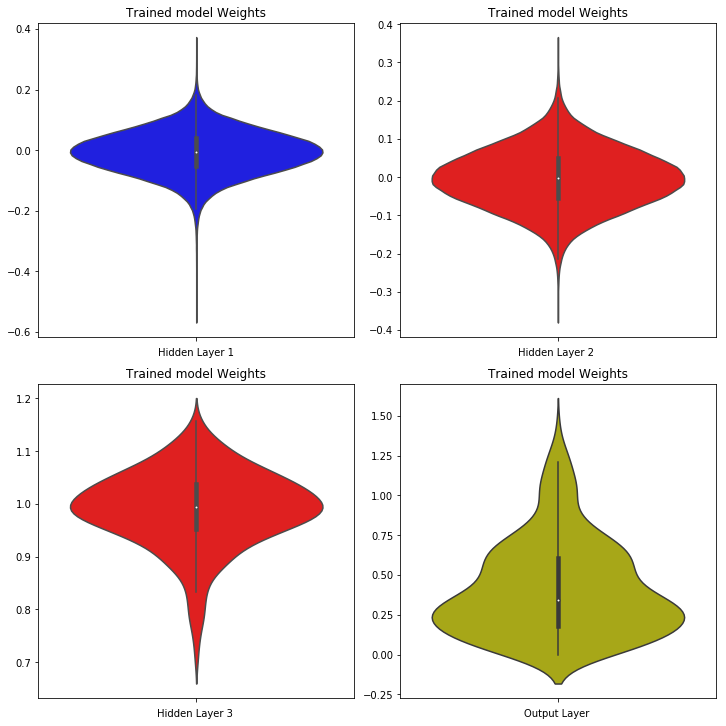

In [0]:
w_after = model_BN_DO.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2> 3LP + 3Batch-Norm + 3Droup Out + AdamOptimizer </2>

In [0]:
# Multilayer perceptron

model_3BN_DO = Sequential()

model_3BN_DO.add(Dense(layer_1_neurons, activation='relu', input_shape=(784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3BN_DO.add(BatchNormalization())
model_3BN_DO.add(Dropout(0.5))

model_3BN_DO.add(Dense(layer_2_neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3BN_DO.add(BatchNormalization())
model_3BN_DO.add(Dropout(0.5))

model_3BN_DO.add(Dense(layer_3_neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_3BN_DO.add(BatchNormalization())
model_3BN_DO.add(Dropout(0.5))

model_3BN_DO.add(Dense(10, activation='softmax'))


model_3BN_DO.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_11 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_13 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 400)               240400    
_________________________________________________________________
batch_normalization_12 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_14 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 200)             

In [0]:
model_3BN_DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3BN_DO.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.5314 - acc: 0.8360 - val_loss: 0.1549 - val_acc: 0.9512
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2248 - acc: 0.9320 - val_loss: 0.1107 - val_acc: 0.9648
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1720 - acc: 0.9483 - val_loss: 0.0957 - val_acc: 0.9693
Epoch 4/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1400 - acc: 0.9576 - val_loss: 0.0886 - val_acc: 0.9732
Epoch 5/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.1242 - acc: 0.9614 - val_loss: 0.0849 - val_acc: 0.9747
Epoch 6/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1135 - acc: 0.9651 - val_loss: 0.0778 - val_acc: 0.9780
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1028 - acc: 0.9685 - val_loss: 0.0688 - val_ac

Test score: 0.05504131586312724
Test accuracy: 0.9847


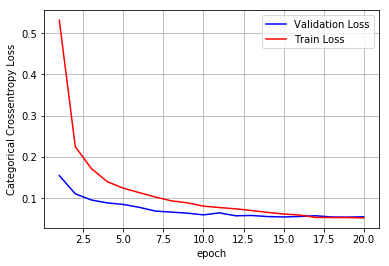

In [0]:
score = model_3BN_DO.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

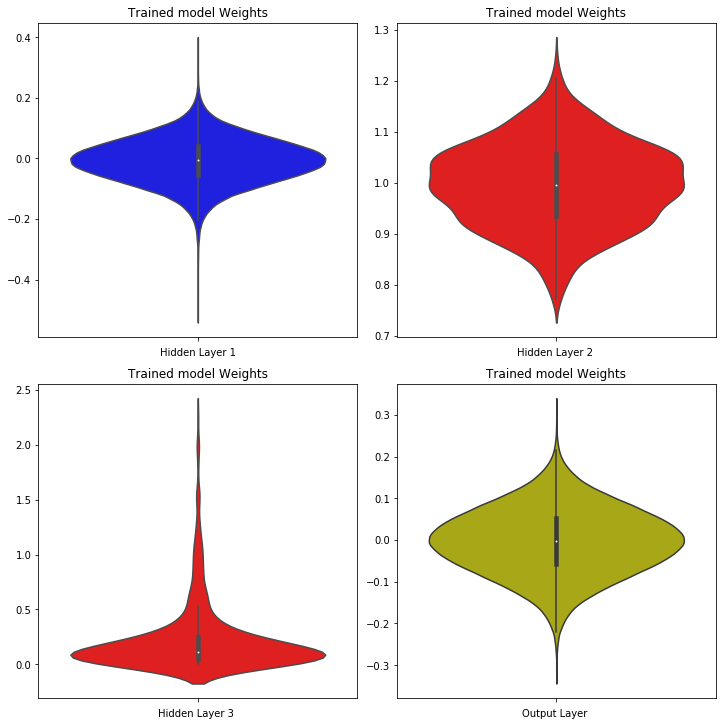

In [0]:
w_after = model_3BN_DO.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2>  5 Hidden layers without Batch Normalization and DropOuts  </h2>

In [0]:
import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
layer_1_neurons = 600
layer_2_neurons = 500
layer_3_neurons = 400
layer_4_neurons = 200
layer_5_neurons = 100
output = 10

In [0]:
#Neural network initilization
model = Sequential()

In [0]:
#defining layers with number of neurons in each layer , activation function and weight initilization method
model.add(Dense(layer_1_neurons,input_shape = (784,),activation = "relu",kernel_initializer= keras.initializers.he_normal(seed=None)))

model.add(Dense(layer_2_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))

model.add(Dense(layer_3_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))

model.add(Dense(layer_4_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))

model.add(Dense(layer_5_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))

model.add(Dense(output,activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_48 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_49 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_50 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_51 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_52 (Dense)             (None, 10)                1010      
Total params: 1,073,210
Trainable params: 1,073,210
Non-trainable params: 0
___________________________________________

In [0]:
#compling the model with type of optimization technique,loss and metrics
model.compile(optimizer = 'adam', loss=['categorical_crossentropy'], metrics=['accuracy'])

In [0]:
#fitting the train data ,so the data passes through each layer and compute loss and through back prop weights get updated after each batch.
history = model.fit(x=X_train, y=Y_train, batch_size=200, epochs=20, verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.2132 - acc: 0.9354 - val_loss: 0.1593 - val_acc: 0.9521
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0881 - acc: 0.9734 - val_loss: 0.0876 - val_acc: 0.9724
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0618 - acc: 0.9805 - val_loss: 0.0894 - val_acc: 0.9732
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0470 - acc: 0.9851 - val_loss: 0.0763 - val_acc: 0.9789
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0355 - acc: 0.9890 - val_loss: 0.0895 - val_acc: 0.9740
Epoch 6/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0359 - acc: 0.9884 - val_loss: 0.0881 - val_acc: 0.9783
Epoch 7/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0279 - acc: 0.9916 - val_loss: 0.0771 - val_acc

Test score: 0.10365875401893845
Test accuracy: 0.9801


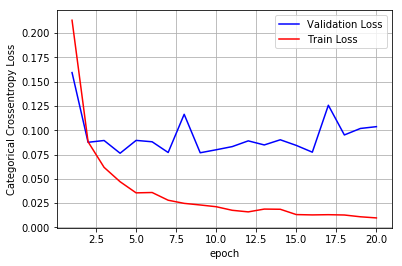

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

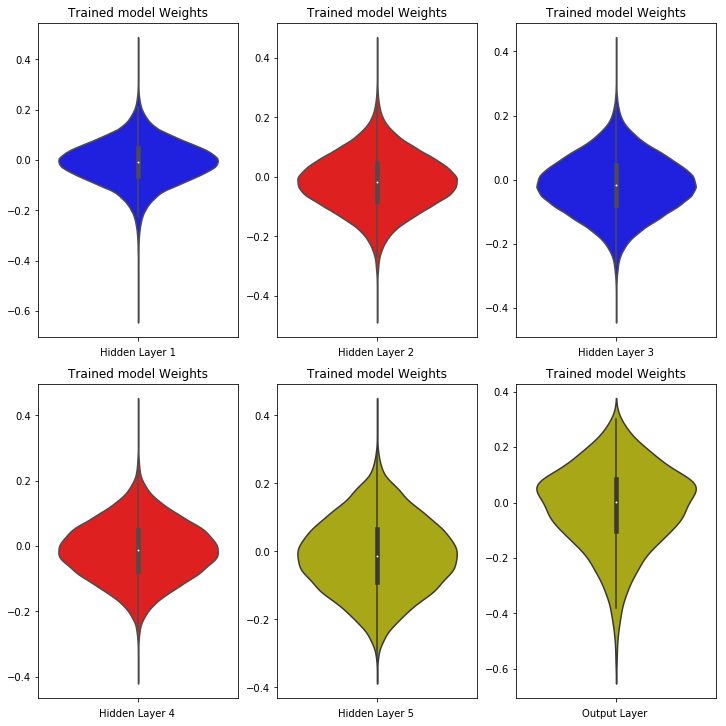

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (10,10))
plt.title("Weight matrices after model trained")

plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

 <h3>  5LP + Relu activation + Adam Opti + 2BN layer</h3>

In [0]:
from keras.layers.normalization import BatchNormalization

model_BN = Sequential()

model_BN.add(Dense(layer_1_neurons,input_shape = (784,),activation = "relu",kernel_initializer= keras.initializers.he_normal(seed=None)))

model_BN.add(Dense(layer_2_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))


model_BN.add(Dense(layer_3_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))

model_BN.add(Dense(layer_4_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_BN.add(BatchNormalization())

model_BN.add(Dense(layer_5_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_BN.add(BatchNormalization())

model_BN.add(Dense(output,activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_BN.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_54 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_55 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_56 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_14 (Batc (None, 200)               800       
_________________________________________________________________
dense_57 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_15 (Batc (None, 100)             

In [0]:
model_BN.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_BN.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.4805 - acc: 0.8596 - val_loss: 0.2569 - val_acc: 0.9267
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2237 - acc: 0.9369 - val_loss: 0.1959 - val_acc: 0.9428
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1699 - acc: 0.9528 - val_loss: 0.1688 - val_acc: 0.9503
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1393 - acc: 0.9614 - val_loss: 0.1508 - val_acc: 0.9543
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1169 - acc: 0.9681 - val_loss: 0.1422 - val_acc: 0.9562
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1018 - acc: 0.9727 - val_loss: 0.1307 - val_acc: 0.9586
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0890 - acc: 0.9768 - val_loss: 0.1268 - val_acc

Test score: 0.09882637539617717
Test accuracy: 0.9679


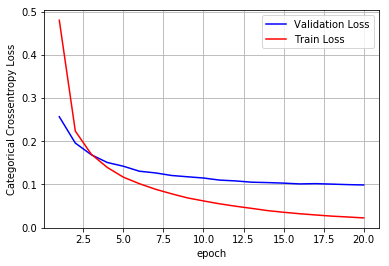

In [0]:
score = model_BN.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

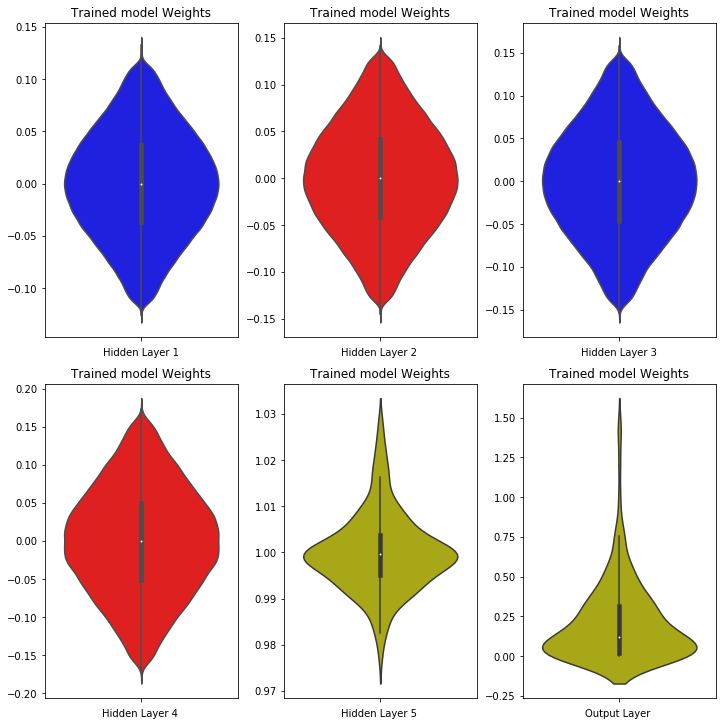

In [0]:
w_after = model_BN.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (10,10))
plt.title("Weight matrices after model trained")

plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2>5LP + relu activation + ADAM optimizer +4BN </h2>

In [0]:
from keras.layers.normalization import BatchNormalization

model_2BN = Sequential()

model_2BN.add(Dense(layer_1_neurons,input_shape = (784,),activation = "relu",kernel_initializer= keras.initializers.he_normal(seed=None)))

model_2BN.add(Dense(layer_2_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2BN.add(BatchNormalization())

model_2BN.add(Dense(layer_3_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2BN.add(BatchNormalization())

model_2BN.add(Dense(layer_4_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2BN.add(BatchNormalization())

model_2BN.add(Dense(layer_5_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2BN.add(BatchNormalization())

model_2BN.add(Dense(output,activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2BN.summary()


model_2BN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model_2BN.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_60 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_16 (Batc (None, 500)               2000      
_________________________________________________________________
dense_61 (Dense)             (None, 400)               200400    
_________________________________________________________________
batch_normalization_17 (Batc (None, 400)               1600      
_________________________________________________________________
dense_62 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_18 (Batc (None, 200)             

Test score: 0.08353870632638864
Test accuracy: 0.9788


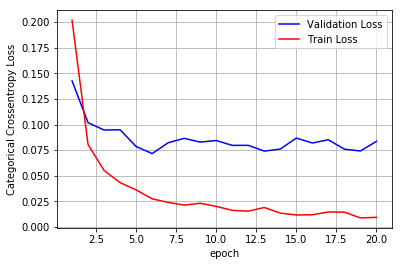

In [0]:
score = model_2BN.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

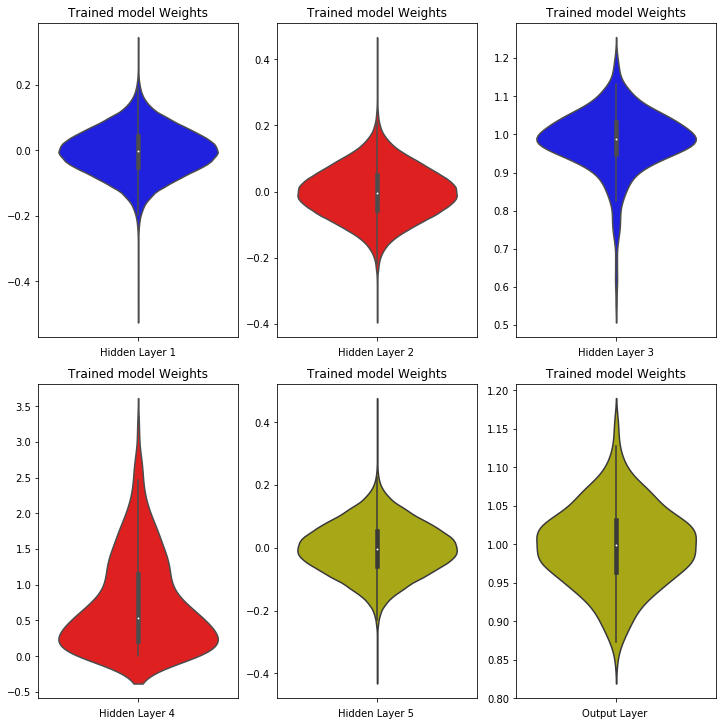

In [0]:
w_after = model_2BN.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (10,10))
plt.title("Weight matrices after model trained")

plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2> 5LP + ReLU + Adam + 2 Droupout</h2>

In [0]:
# Multilayer perceptron
from keras.layers import Dropout


model_2DO = Sequential()

model_2DO.add(Dense(layer_1_neurons,input_shape = (784,),activation = "relu",kernel_initializer= keras.initializers.he_normal(seed=None)))

model_2DO.add(Dense(layer_2_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2DO.add(Dropout(0.5))
              
model_2DO.add(Dense(layer_3_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2DO.add(Dropout(0.5))

model_2DO.add(Dense(layer_4_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2DO.add(Dropout(0.5))
              
model_2DO.add(Dense(layer_5_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2DO.add(Dropout(0.5))
              
model_2DO.add(Dense(output,activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_2DO.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_66 (Dense)             (None, 500)               300500    
_________________________________________________________________
dropout_16 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 400)               200400    
_________________________________________________________________
dropout_17 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 200)             

In [0]:
model_2DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2DO.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 30s 506us/step - loss: 0.5368 - acc: 0.8436 - val_loss: 0.1739 - val_acc: 0.9568
Epoch 2/20
60000/60000 [==============================] - 28s 461us/step - loss: 0.2217 - acc: 0.9501 - val_loss: 0.1522 - val_acc: 0.9624
Epoch 3/20
60000/60000 [==============================] - 28s 461us/step - loss: 0.1844 - acc: 0.9597 - val_loss: 0.1460 - val_acc: 0.9662
Epoch 4/20
60000/60000 [==============================] - 28s 469us/step - loss: 0.1570 - acc: 0.9650 - val_loss: 0.1764 - val_acc: 0.9648
Epoch 5/20
60000/60000 [==============================] - 28s 461us/step - loss: 0.1462 - acc: 0.9695 - val_loss: 0.1281 - val_acc: 0.9721
Epoch 6/20
60000/60000 [==============================] - 27s 458us/step - loss: 0.1390 - acc: 0.9705 - val_loss: 0.1187 - val_acc: 0.9747
Epoch 7/20
60000/60000 [==============================] - 28s 470us/step - loss: 0.1230 - acc: 0.9747 - val_loss: 0.

Test score: 0.18350251794430017
Test accuracy: 0.9759


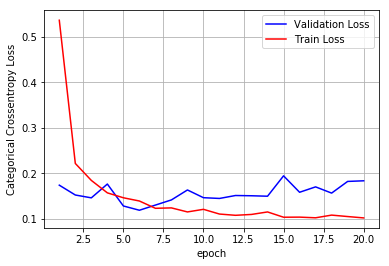

In [0]:
score = model_2DO.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

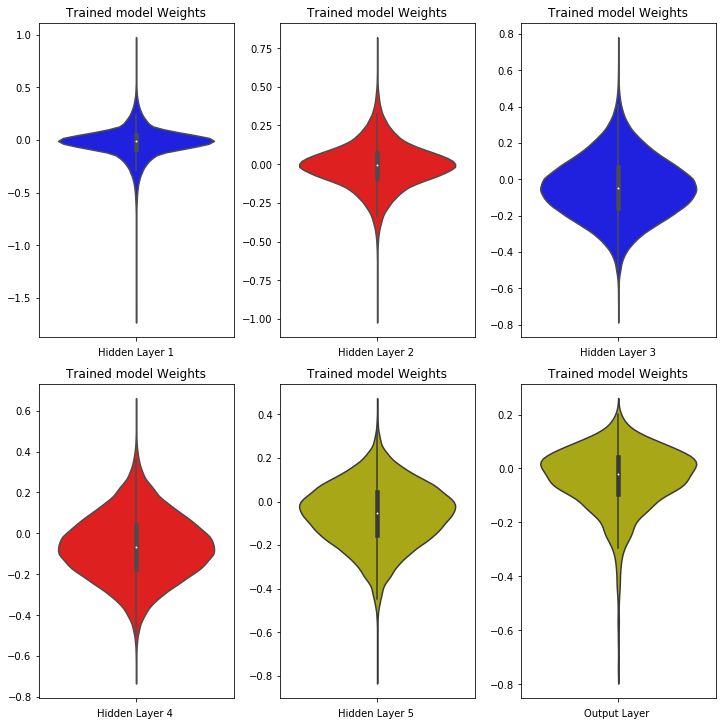

In [0]:
w_after = model_2DO.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (10,10))
plt.title("Weight matrices after model trained")

plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2> 5LP + ReLU + ADAM + 5 Droupout </h2>

In [0]:
# Multilayer perceptron
from keras.layers import Dropout


model_5DO = Sequential()

model_5DO.add(Dense(layer_1_neurons,input_shape = (784,),activation = "relu",kernel_initializer= keras.initializers.he_normal(seed=None)))
model_5DO.add(Dropout(0.5))

model_5DO.add(Dense(layer_2_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_5DO.add(Dropout(0.5))
              
model_5DO.add(Dense(layer_3_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_5DO.add(Dropout(0.5))

model_5DO.add(Dense(layer_4_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_5DO.add(Dropout(0.5))
              
model_5DO.add(Dense(layer_5_neurons,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_5DO.add(Dropout(0.5))
              
model_5DO.add(Dense(output,activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=None)))

model_5DO.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_20 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 500)               300500    
_________________________________________________________________
dropout_21 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 400)               200400    
_________________________________________________________________
dropout_22 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 200)             

In [0]:
model_5DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_5DO.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 32s 528us/step - loss: 0.8525 - acc: 0.7303 - val_loss: 0.2581 - val_acc: 0.9342
Epoch 2/20
60000/60000 [==============================] - 30s 492us/step - loss: 0.3734 - acc: 0.9111 - val_loss: 0.1822 - val_acc: 0.9543
Epoch 3/20
60000/60000 [==============================] - 29s 489us/step - loss: 0.3201 - acc: 0.9258 - val_loss: 0.1545 - val_acc: 0.9613
Epoch 4/20
60000/60000 [==============================] - 29s 488us/step - loss: 0.2865 - acc: 0.9347 - val_loss: 0.1517 - val_acc: 0.9625
Epoch 5/20
60000/60000 [==============================] - 29s 491us/step - loss: 0.2645 - acc: 0.9398 - val_loss: 0.1434 - val_acc: 0.9667
Epoch 6/20
60000/60000 [==============================] - 29s 488us/step - loss: 0.2557 - acc: 0.9426 - val_loss: 0.1459 - val_acc: 0.9681
Epoch 7/20
60000/60000 [==============================] - 29s 489us/step - loss: 0.2470 - acc: 0.9456 - val_loss: 0.

Test score: 0.12434461448691418
Test accuracy: 0.9744


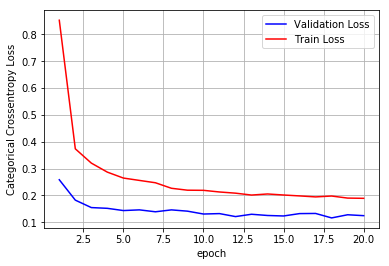

In [0]:
score = model_5DO.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

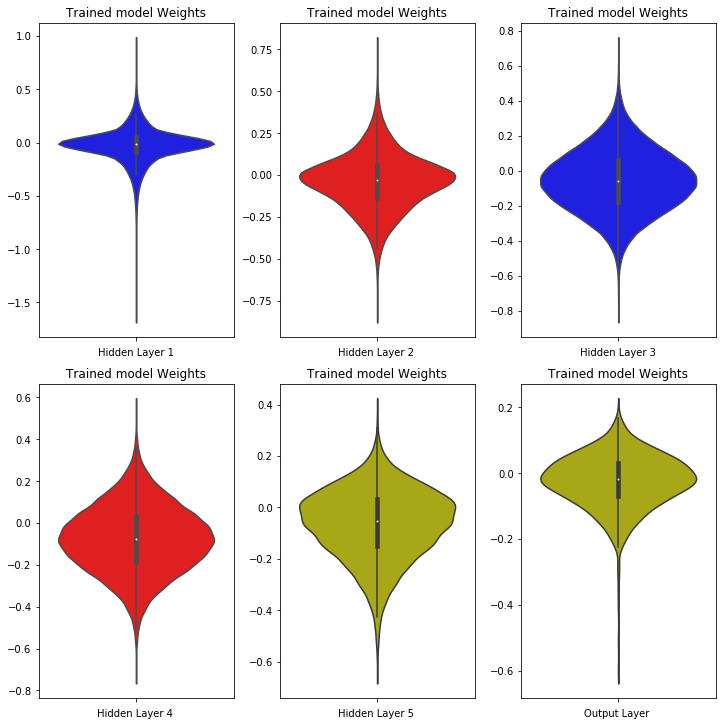

In [0]:
w_after = model_5DO.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (10,10))
plt.title("Weight matrices after model trained")

plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2> 5LP + 2Batch-Norm + 2Droup Out + AdamOptimizer </2>

In [0]:
# Multilayer perceptron

model_BN_DO = Sequential()

model_BN_DO.add(Dense(layer_1_neurons, activation='relu', input_shape=(784,), kernel_initializer=keras.initializers.he_normal(seed=None)))

model_BN_DO.add(Dense(layer_2_neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))

model_BN_DO.add(Dense(layer_3_neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_BN_DO.add(BatchNormalization())
model_BN_DO.add(Dropout(0.5))

model_BN_DO.add(Dense(layer_4_neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))

model_BN_DO.add(Dense(layer_5_neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_BN_DO.add(BatchNormalization())
model_BN_DO.add(Dropout(0.5))

model_BN_DO.add(Dense(output, activation='softmax'))


model_BN_DO.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_78 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_79 (Dense)             (None, 400)               200400    
_________________________________________________________________
batch_normalization_20 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_25 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_81 (Dense)             (None, 100)             

In [0]:
model_BN_DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_BN_DO.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.4301 - acc: 0.8714 - val_loss: 0.1587 - val_acc: 0.9513
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1543 - acc: 0.9564 - val_loss: 0.1287 - val_acc: 0.9619
Epoch 3/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.1025 - acc: 0.9703 - val_loss: 0.0944 - val_acc: 0.9709
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0777 - acc: 0.9780 - val_loss: 0.1103 - val_acc: 0.9703
Epoch 5/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0581 - acc: 0.9829 - val_loss: 0.0852 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0463 - acc: 0.9860 - val_loss: 0.0925 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0397 - acc: 0.9880 - val_loss: 0.0727 - val_ac

Test score: 0.08410544306887169
Test accuracy: 0.9793


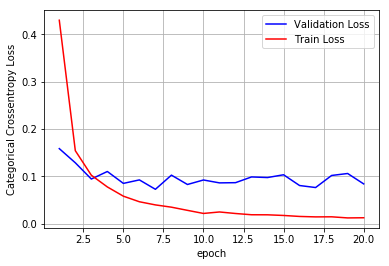

In [0]:
score = model_BN_DO.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

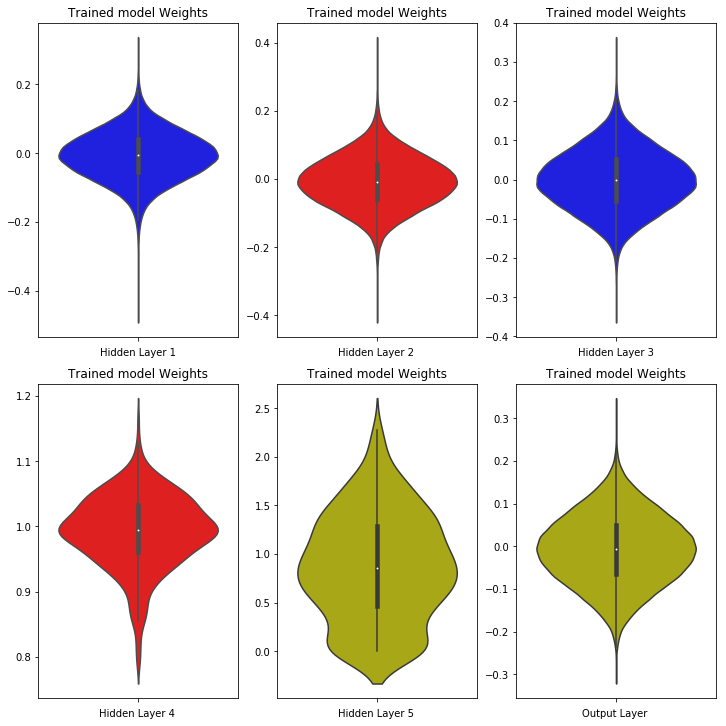

In [0]:
w_after = model_BN_DO.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (10,10))
plt.title("Weight matrices after model trained")

plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h2> 5LP + 3Batch-Norm + 5Droup Out + AdamOptimizer </2>

In [0]:
# Multilayer perceptron

model_4BN_5DO = Sequential()

model_4BN_5DO.add(Dense(layer_1_neurons, activation='relu', input_shape=(784,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_4BN_5DO.add(Dropout(0.5))

model_4BN_5DO.add(Dense(layer_2_neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_4BN_5DO.add(BatchNormalization())
model_4BN_5DO.add(Dropout(0.5))

model_4BN_5DO.add(Dense(layer_3_neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_4BN_5DO.add(BatchNormalization())
model_4BN_5DO.add(Dropout(0.5))

model_4BN_5DO.add(Dense(layer_4_neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_4BN_5DO.add(BatchNormalization())
model_4BN_5DO.add(Dropout(0.5))

model_4BN_5DO.add(Dense(layer_5_neurons, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)))
model_4BN_5DO.add(BatchNormalization())
model_4BN_5DO.add(Dropout(0.5))

model_4BN_5DO.add(Dense(output, activation='softmax'))


model_4BN_5DO.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_27 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_22 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_28 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 400)               200400    
_________________________________________________________________
batch_normalization_23 (Batc (None, 400)             

In [0]:
model_4BN_5DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_4BN_5DO.fit(X_train, Y_train, batch_size=200, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 158us/step - loss: 1.2126 - acc: 0.6256 - val_loss: 0.2989 - val_acc: 0.9137
Epoch 2/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.3837 - acc: 0.8884 - val_loss: 0.1872 - val_acc: 0.9482
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.2666 - acc: 0.9263 - val_loss: 0.1365 - val_acc: 0.9623
Epoch 4/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2150 - acc: 0.9407 - val_loss: 0.1202 - val_acc: 0.9667
Epoch 5/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1851 - acc: 0.9489 - val_loss: 0.1045 - val_acc: 0.9719
Epoch 6/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1632 - acc: 0.9549 - val_loss: 0.1031 - val_acc: 0.9721
Epoch 7/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1497 - acc: 0.9592 - val_loss: 0.0928 - 

Test score: 0.07542229047210422
Test accuracy: 0.9822


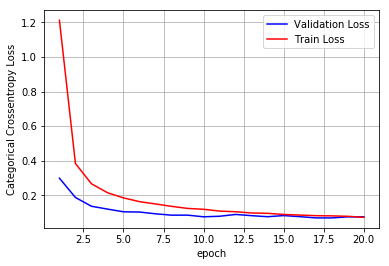

In [0]:
score = model_4BN_5DO.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,21))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

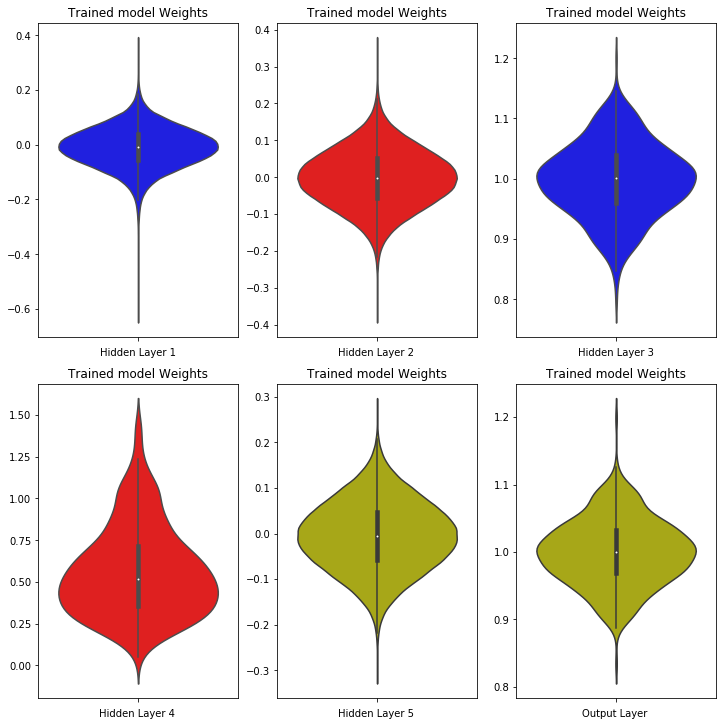

In [0]:
w_after = model_4BN_5DO.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (10,10))
plt.title("Weight matrices after model trained")

plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

<h1>Conclusions</h1>

Here we have trained multiple neural networks (MLP) with different number of hidden layers and different type of hiddel layers with combination of simple Relu activation layer ,Batch normalization layer and Droup out layer.what we have observed is with same number of epoch,batch size,activation function and optimizer how the log loss and accuracy of the model changes.
so we can see that model performs well when epoch is high,deep layer's (more hidden layer) and when their is a combination of Batch normilizing and Drop Out layer.

<h2>Result's</h2>

In [79]:
#for ploting
def plot_gr(X_axis,LP_loss,LP_acc,layers):
    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    plt.plot(X_axis,LP_loss)
    plt.legend("loss")
    plt.xlabel ("Model")
    plt.ylabel("loss")
    plt.title(str(layers) +"layer perseptron")
    plt.subplot(1,2,2)
    plt.plot(X_axis,LP_acc)
    plt.xlabel ("Model")
    plt.ylabel("Accuracy")
    plt.legend("Acc")
    plt.title(str(layers) +"layer perseptron")
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [80]:
#BN refers to Batch Normilization layer
#DO refers to Drop Out layer

<h2> 2 Layer perseptron </h2>

In [81]:
#Batchsize = 200
#Activation = Relu
#Optimizer = Adam
#Number of neurons in 1st layer = 600                                   
#Number of neurons in second layer = 300 

In [82]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["# Layers","# BN","# DO","Test Loss","Test Acc"]
x.add_row([2 ,0 ,0 ,0.1261 ,0.9790])
x.add_row([2 ,1 ,0 ,0.0927 ,0.9708])
x.add_row([2 ,2 ,0 ,0.0845 ,0.9799])
x.add_row([2 ,0 ,1 ,0.0766 ,0.9832])
x.add_row([2 ,0 ,2 ,0.0839 ,0.9820])
x.add_row([2 ,2 ,2 ,0.0596 ,0.9825])
print(x)

+----------+------+------+-----------+----------+
| # Layers | # BN | # DO | Test Loss | Test Acc |
+----------+------+------+-----------+----------+
|    2     |  0   |  0   |   0.1261  |  0.979   |
|    2     |  1   |  0   |   0.0927  |  0.9708  |
|    2     |  2   |  0   |   0.0845  |  0.9799  |
|    2     |  0   |  1   |   0.0766  |  0.9832  |
|    2     |  0   |  2   |   0.0839  |  0.982   |
|    2     |  2   |  2   |   0.0596  |  0.9825  |
+----------+------+------+-----------+----------+


In [83]:
X_axis = ["simple","1BN","2BN","1DO","2DO","2BN+2DO"]
two_LP_loss = [0.1261,0.0927,0.0845,0.0766,0.0839,0.0596]
two_LP_acc = [0.9790,0.9708,0.9799,0.9832,0.9820,0.9825]

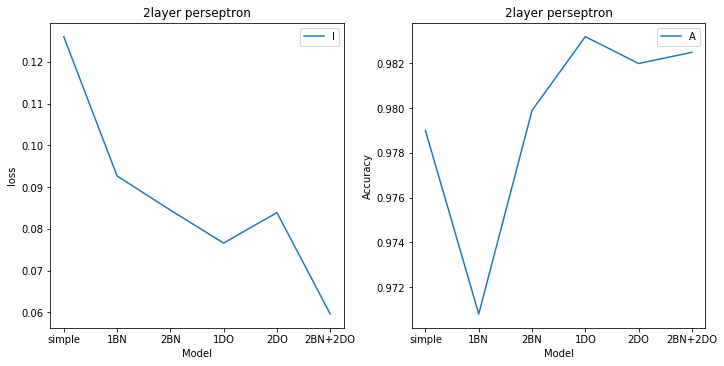

In [84]:
plot_gr(X_axis,two_LP_loss,two_LP_acc,2)

### Observation:
we can see that as we add batch normilization and dropouts the loss get decreases and accuracy is getting increased

<h2> 3 Layer perseptron <h/2>

In [85]:
#Batchsize = 200
#Activation = Relu
#Optimizer = Adam
#Number of neurons in 1st layer = 600                                   
#Number of neurons in 2nd layer = 400
#Number of neurons in 3rd layer = 200

In [86]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["# Layers","# BN","# DO","Test Loss","Test Acc"]
x.add_row([3 ,0 ,0 ,0.9408 ,0.9815])
x.add_row([3 ,1 ,0 ,0.0900 ,0.9712])
x.add_row([3 ,2 ,0 ,0.8589 ,0.9808])
x.add_row([3 ,0 ,2 ,0.1268 ,0.9821])
x.add_row([3 ,0 ,3 ,0.1007 ,0.9784])
x.add_row([3 ,2 ,2 ,0.0761 ,0.9837])
x.add_row([3 ,3 ,3 ,0.0550 ,0.9847])
print(x)

+----------+------+------+-----------+----------+
| # Layers | # BN | # DO | Test Loss | Test Acc |
+----------+------+------+-----------+----------+
|    3     |  0   |  0   |   0.9408  |  0.9815  |
|    3     |  1   |  0   |    0.09   |  0.9712  |
|    3     |  2   |  0   |   0.8589  |  0.9808  |
|    3     |  0   |  2   |   0.1268  |  0.9821  |
|    3     |  0   |  3   |   0.1007  |  0.9784  |
|    3     |  2   |  2   |   0.0761  |  0.9837  |
|    3     |  3   |  3   |   0.055   |  0.9847  |
+----------+------+------+-----------+----------+


In [87]:
X_axis = ["simple","1BN","2BN","2DO","3DO","2BN+2DO","3BN+3DO"]
three_LP_loss = [0.9408  ,0.09,0.8589,0.1268  ,0.1007  ,0.0761  ,0.055   ]
three_LP_acc = [0.9815  ,0.9712  ,0.9808  ,0.9821  ,0.9784  ,0.9837  ,0.9847  ]

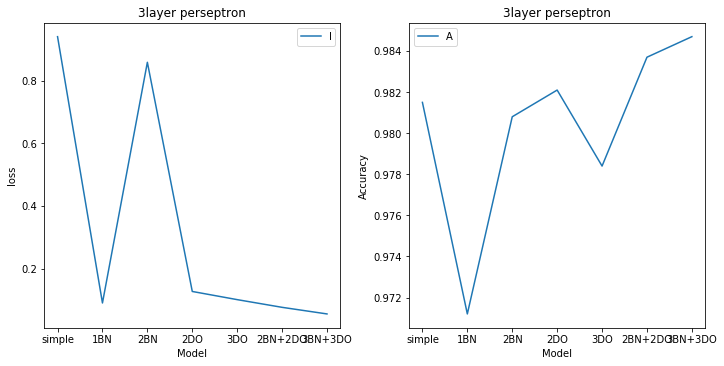

In [88]:
plot_gr(X_axis,three_LP_loss,three_LP_acc,3)

### Observation:
we can see that as we add batch normilization and dropouts the loss get decreases and accuracy is getting increased

<h2> 5 Layer perseptron </h2>

In [89]:
#Batchsize = 200
#Activation = Relu
#Optimizer = Adam
#Number of neurons in 1st layer = 600                                   
#Number of neurons in 2nd layer = 300
#Number of neurons in 3rd layer = 400
#Number of neurons in 4th layer = 200

In [90]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["# Layers","# BN","# DO","Test Loss","Test Acc"]
x.add_row([5 ,0 ,0 ,0.1036 ,0.9801])
x.add_row([5 ,2 ,0 ,0.0988 ,0.9679])
x.add_row([5 ,4 ,0 ,0.0835 ,0.9788])
x.add_row([5 ,0 ,2 ,0.1835 ,0.9759])
x.add_row([5 ,0 ,5 ,0.1243 ,0.9744])
x.add_row([5 ,2 ,2 ,0.0841 ,0.9793])
x.add_row([5 ,3 ,5 ,0.0754 ,0.9822])
print(x)

+----------+------+------+-----------+----------+
| # Layers | # BN | # DO | Test Loss | Test Acc |
+----------+------+------+-----------+----------+
|    5     |  0   |  0   |   0.1036  |  0.9801  |
|    5     |  2   |  0   |   0.0988  |  0.9679  |
|    5     |  4   |  0   |   0.0835  |  0.9788  |
|    5     |  0   |  2   |   0.1835  |  0.9759  |
|    5     |  0   |  5   |   0.1243  |  0.9744  |
|    5     |  2   |  2   |   0.0841  |  0.9793  |
|    5     |  3   |  5   |   0.0754  |  0.9822  |
+----------+------+------+-----------+----------+


In [91]:
X_axis = ["simple","2BN","4BN","2DO","5DO","2BN+2DO","3BN+5DO"]
five_LP_loss = [0.1036  ,0.0988  ,0.0835,0.1835  ,0.1243  ,0.0841  ,0.0754  ]
five_LP_acc = [0.9801  ,0.9679  ,0.9788,0.9759  ,0.9744  ,0.9793  ,0.9822  ]

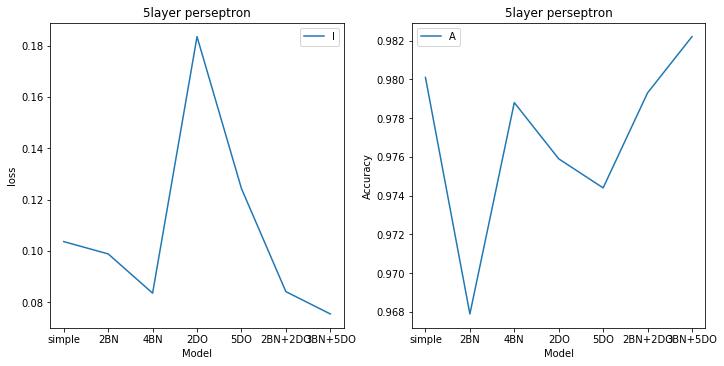

In [92]:
plot_gr(X_axis,five_LP_loss,five_LP_acc,5)

### Observation:
we can see that as we add batch normilization and dropouts the loss get decreases and accuracy is getting increased.
In 2DO case their is a chanve of increase in loss because of no batch normilization .The layers in deep network would have encountered different distribution for eatch batch,so convergence to orginal solution make take more epoch. 